# Cramér-Lundberg model simulation using Poisson processes

In this notebook, we will try to make easy-to-replicate simulations of the Cramér-Lundberg model, using a Poisson process to simulate random claims. 

The `get_claims_poisson()` function's goal is no track the company's wealth, taking into account:
- the initial fortune, represented by `u`,
- `n`, the number of days we are simulating,
- `premium`, the monthly cost that the customer pays to the company,
- `lamb`, corresponding to $\lambda$ which is the parameter of the Poisson process,
- `claims_max_cost`, the highest cost that the insurance company pays to the customer in the event of a claims.
This function returns the tracking of the general fortune, as well as the tracking of the number of claims, and the corresponding time axis.

`plot_growth()` is a function that plots the growth of the fortune of the company. Note that the fortune is done using `plt.plot()`, whereas the counting of the number of claims is done using `plt.step()`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_claims_poisson(u, n, premium, lamb, claims_max_cost):
    t = np.arange(0, n+.1, .1)
    R = premium*t+u
    lamb = .02
    N = len(t)
    X_T = [np.random.poisson(lamb, N)]
    S = [[np.sum(X[0:i]) for i in range(N)] for X in X_T]
    S = np.reshape(S, (N,))
    for i in range(len(t)-1):
        if S[i] < S[i+1]:
            X = np.random.uniform(0, claims_max_cost)
            R[i+1:] -= X
    return R, S, t


def plot_growth(R, S, t):
    fig=plt.figure(figsize=(12.8,9.6))
    fig, ax1 = plt.subplots(figsize=(12.8,9.6))
    g1 = ax1.plot(t, R, label="Fortune (€)")
    ax1.set_ylabel("Fortune (€)")
    ax1.set_xlabel("Number of days")
    #plot claims using a secondary y axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("Number of claims")
    g2 = ax2.step(t, S, color='orange', label="Number of claims")
    #preparing legend
    lns = g1+g2
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs)
    plt.title("Tracking of the fortune using Cramér-Lundberg Model")
    plt.show()

<Figure size 921.6x691.2 with 0 Axes>

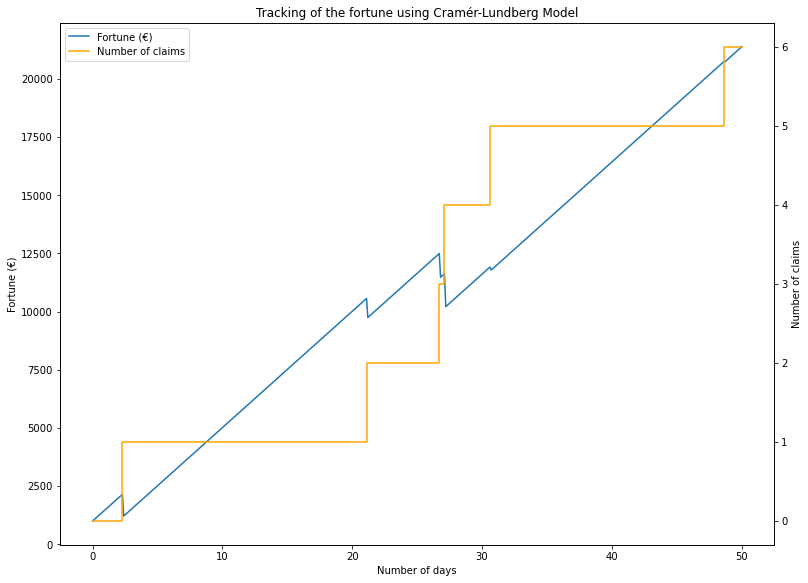

In [3]:
R, S, t = get_claims_poisson(u = 1000,
                             n = 50,
                             premium = 500,
                             lamb = 5,
                             claims_max_cost = 2000)
plot_growth(R, S, t)

The variables can be modified, depending of the insurance company and the frequencies of the claims. If these events happen very frequently, then the premium could be increased to maintain a positive growth.